#### Импортируем все библиотеки. Пока не изучил данные и не определился, какую лучше использовать

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
# так графики более корректно отображаются на ip
plt.style.use('default') #для лучшего отображения на темном фоне

import seaborn as sns
sns.set_theme(style="whitegrid")

import plotly
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

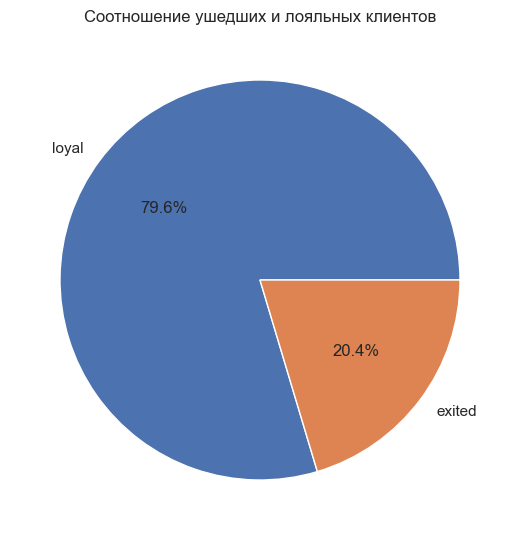

In [3]:
churn_data_ex = churn_data['Exited'].value_counts() # считаем число
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_data_ex, #значения
    labels= ['loyal','exited'], #подписи
    autopct='%.1f%%', #формат выведения процента
#    explode=[0.1,0.05,0,0,0,0,0,0,0,0] #это отступы кусочков
    );
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=12)

Соотношение лояльных и нелояльных примерно 80 на 20. Т.е. лояльны банку клиентов в базе в примерно 4 раза больше, чем нелояльных.
Сложно судить о том, хороший это показатель для бизнеса или нет т.к. для этого надо понимать показатели в сравнении с подобными показателями других банков, например. Но то, что по сути каждый 5ый клиент в базе ушел безусловно является поводом задуматься и разобраться почему.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [4]:
churn_data_balance = churn_data[churn_data['Balance']>2500]
churn_data_balance.head()
#axes.hist(
#    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
#)
#axes.set_title("Гистограмма заболеваемости в России")
#axes.xaxis.set_tick_params(rotation=30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


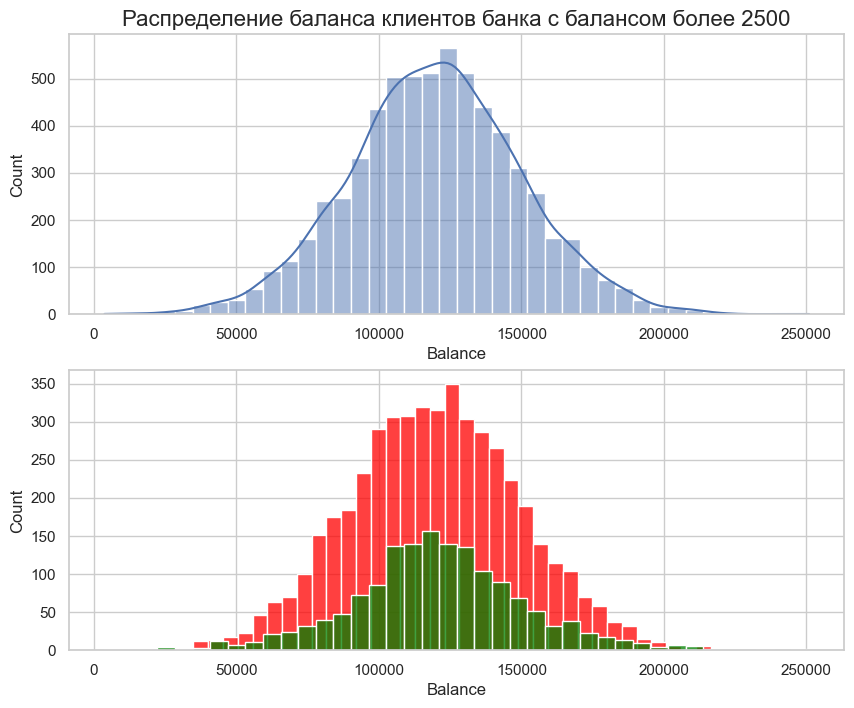

In [5]:
churn_data_balance = churn_data[churn_data['Balance']>2500]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data_balance,
    x='Balance',
    bins=40,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса клиентов банка с балансом более 2500', fontsize=16)

churn_data_balance_loyal = churn_data_balance[churn_data_balance['Exited'] == 0]
sns.histplot(
    data=churn_data_balance_loyal,
    x='Balance',
    bins=40,
    color='red',
    ax=axes[1]
);

churn_data_balance_ex = churn_data_balance[churn_data_balance['Exited'] == 1]
sns.histplot(
    data=churn_data_balance_ex,
    x='Balance',
    bins=40,
    color='green',
    ax=axes[1]
);

Распределение баланса пользователей банка в целом имеет вид очень похожий на график плотности нормального распределения со средним значением около 125000 на счету. Это означает, что баланс пользователей легко прогнозируемая величина, т.к.про нормальное распределение мы +/- все знаем.
Интересно, что распределения для ушедших и лояльных клиентов очень похожи, что видно из нижней совмещенной гистограммы. Я бы предварительно предположил, что по баланс на счету не является значимым фактором, для того, чтобы прогнозировать уйдет клиент или нет. И нужно искать другие факторы, которые на это влияют. Правда это предположение касается клиентов с ненулевым балансом (более 2500)

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Теперь посмотрим на распределение полного баланса, а не только > 2500.

Text(0.5, 1.0, 'Распределение баланса ушедших и лояльных на коробчатой диаграмме')

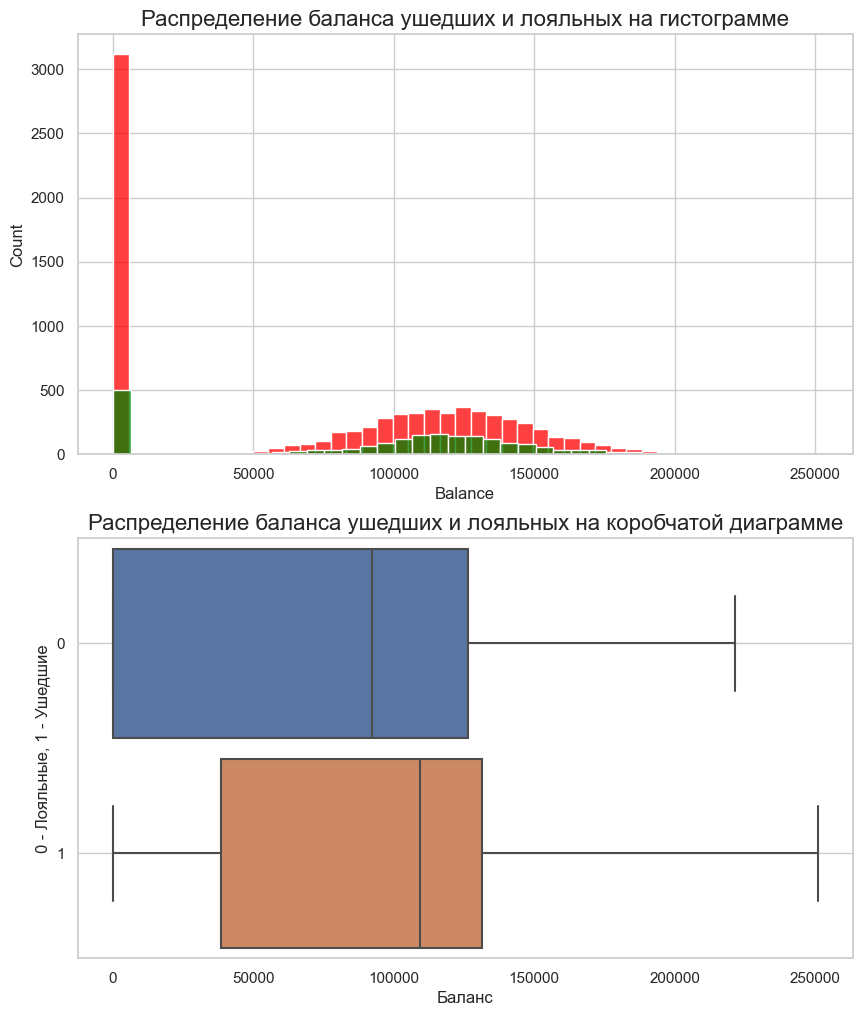

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))


churn_data_balance_loyal = churn_data[churn_data['Exited'] == 0]
sns.histplot(
    data=churn_data_balance_loyal,
    x='Balance',
    bins=40,
    color='red',
    ax=axes[0]
);

churn_data_balance_ex = churn_data[churn_data['Exited'] == 1]
sns.histplot(
    data=churn_data_balance_ex,
    x='Balance',
    bins=40,
    color='green',
    ax=axes[0]
);
axes[0].set_title('Распределение баланса ушедших и лояльных на гистограмме', fontsize=16)

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('0 - Лояльные, 1 - Ушедшие');
boxplot.grid()
axes[1].set_title('Распределение баланса ушедших и лояльных на коробчатой диаграмме', fontsize=16)

В целом гистрограммы опять выглядят похоже. Однако столбец нулевого баланса на красной гистограмме лояльных клиентов заметно выше.
Гипотеза такая - клиенты с нулевым балансом (видимо те, кто не особо пользуются услугами банка), не перестают быть клиентами.
Для анализа более подробного построил коробчатую диарамму. Медианный баланс лояльных клиентов действительно ниже. В данному случае, я бы сделал такое предположение: отказываются от банка те клиенты, которые пользуются его услугами (т.е. имеют ненулевой баланс). Значит причина отказа, вероятно, в недовольстве какими-то улугами банка.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0.5, 1.0, 'Распределение возраста ушедших и лояльных на коробчатой диаграмме')

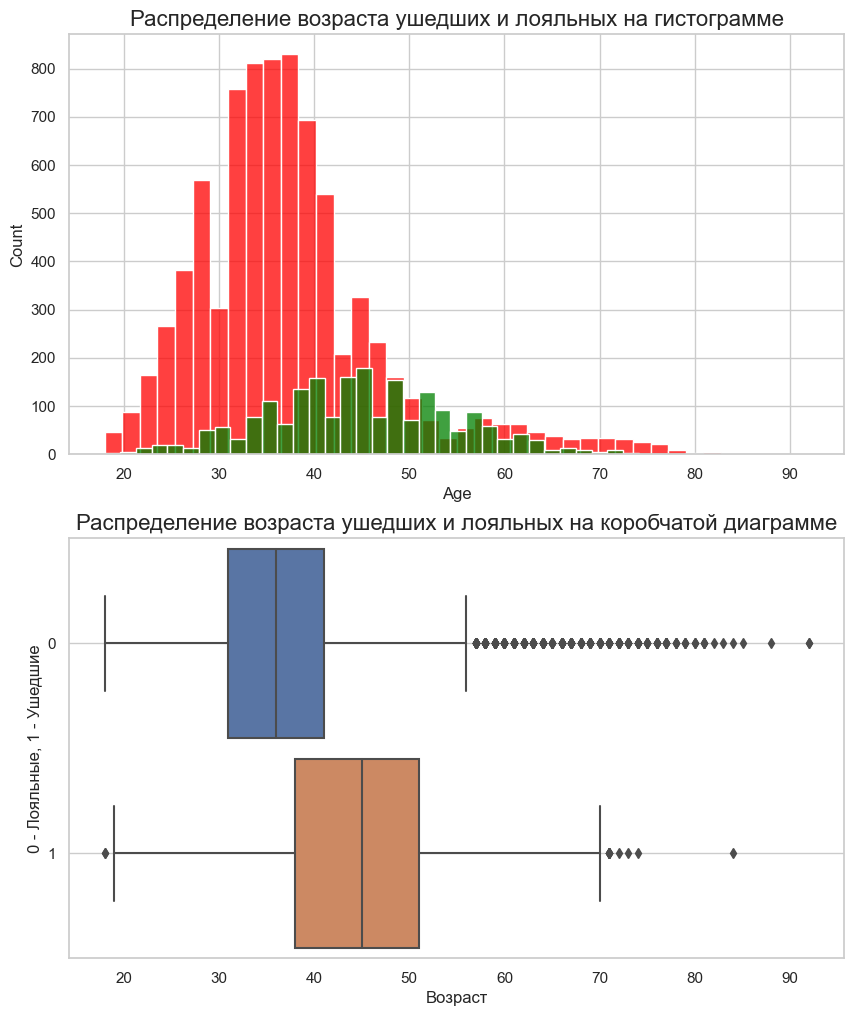

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))


churn_data_balance_loyal = churn_data[churn_data['Exited'] == 0]
sns.histplot(
    data=churn_data_balance_loyal,
    x='Age',
    bins=40,
    color='red',
    ax=axes[0]
);

churn_data_balance_ex = churn_data[churn_data['Exited'] == 1]
sns.histplot(
    data=churn_data_balance_ex,
    x='Age',
    bins=40,
    color='green',
    ax=axes[0]
);
axes[0].set_title('Распределение возраста ушедших и лояльных на гистограмме', fontsize=16)

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('0 - Лояльные, 1 - Ушедшие');
boxplot.grid()
axes[1].set_title('Распределение возраста ушедших и лояльных на коробчатой диаграмме', fontsize=16)

Потенциальных выбросов (а значит совсем случайных или ошибочных данных) больше в группе лояльных.
Зато четко видно, что ушедшие клиенты старше. Медианный возрас ушедших - около 45 лет. И возраст ушедших достаточно достоверно распрелеляется в диапазоне от 38 до 51. Кстати в рамках этого задания видны как раз наглядные преимущества коробчатой диаграммы перед гистограммой в некоторых случаях.В этом случае они очевидны и помогают четко определить интервал.
А банку явно надо обратить внимание на клиентов примерно от 38 до 51 года. Я бы все-таки обозначил эту группу, как 40-50 лет.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

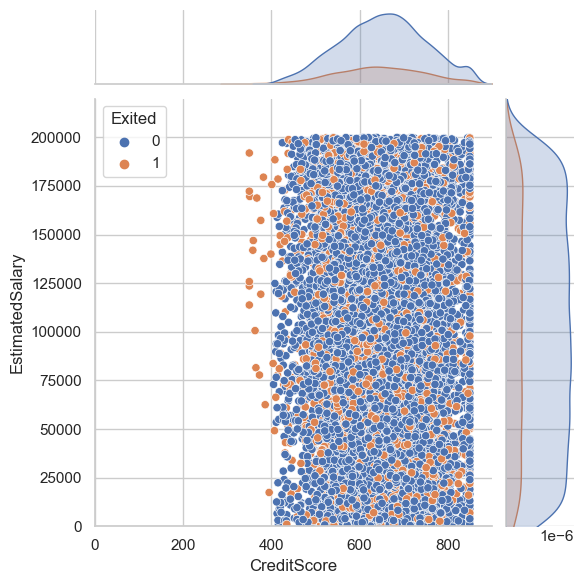

In [8]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (0, 900),
    ylim = (0, 220000),
)


Какой-то явной связи кредитного рейтинга и зарплаты не видно. Можно только сказать, что клиентов с кредитным рейтингом меньше 400 среди лояльных клиентов нет.
Таких клиентов в целом мало, но все же может быть как-то связано с кредитной политикой банка.
Да точно связано, т.к. клиентов с кредитным рейтингом меньше 300 нет вообще!

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Доля ушедших в группе')

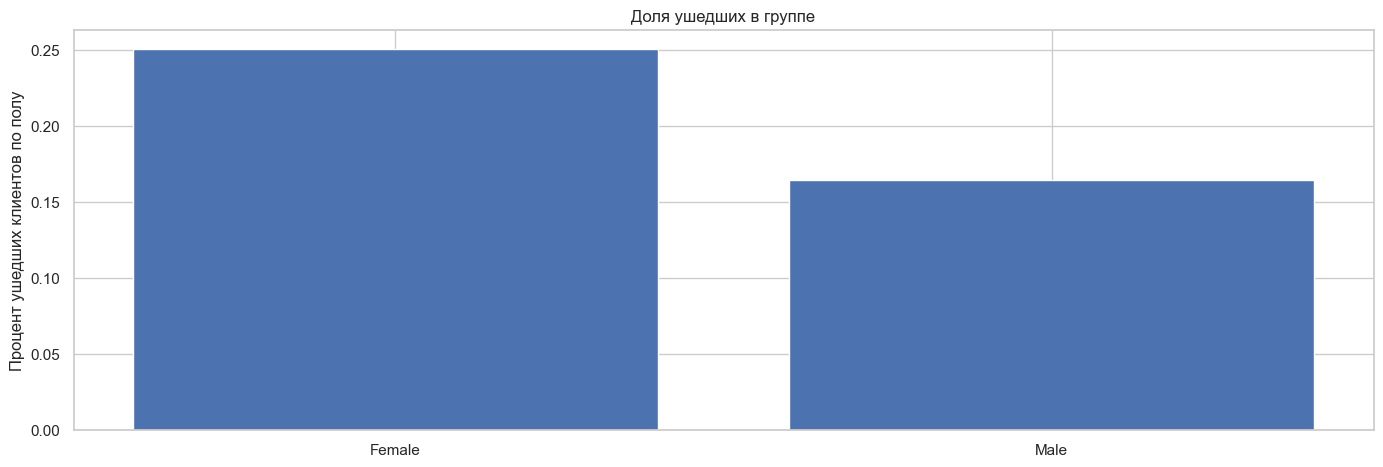

In [9]:
churn_data_gender = churn_data.groupby('Gender')['Exited'].mean()
display(churn_data_gender)


fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = churn_data_gender.index, height = churn_data_gender);
main_axes.set_ylabel('Процент ушедших клиентов по полу')
main_axes.set_title('Доля ушедших в группе')

Женщины уходят чаще. 25% женщин уходит и только 16,5% мужчин. Возможно нужны какие-то ориентированные на женскую аудиторию продукты.

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

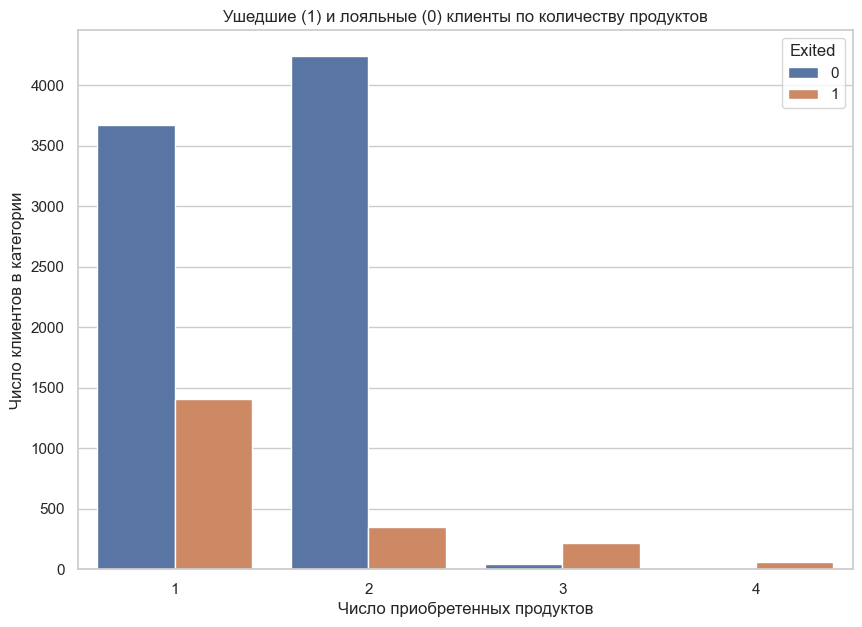

In [10]:
churn_data['Num'] = 1
fig = plt.figure(figsize=(10, 7))


barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Num',
    hue='Exited',
    estimator=sum
)
barplot.set_title('Ушедшие (1) и лояльные (0) клиенты по количеству продуктов');
barplot.set_xlabel('Число приобретенных продуктов');
barplot.set_ylabel('Число клиентов в категории');

In [11]:
churn_data.groupby(by=['NumOfProducts','Exited'])['Num'].sum() 

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              0           46
               1          220
4              1           60
Name: Num, dtype: int64

Вообще данные получились поразительные. Я даже вывел сводную после графика, чтобы проверить данные и точно вычислить соотношения.
Клиенты купившие один продукт уходят достаточно часто. Соотношение примерно (округлим) в 28% случаев - это выше среднего (20%).
А вот купившие 2 продукта более лояльны и уходят менее чем в 8% случаев.
При этом, если клиент покупает больше продуктов, чем 2 шанс того, что он уходит увеличивается. А клиенты купившие 4 продукта все отказались от услуг банка.
Есть гипотеза, что это может быть как-то связано с предыдущим графиком возраста.
Просто чем старше клиент, тем больше шансов, что он купит больше продуктов.
Проверим эту гипотезу. Выведем дополнительно к заданию коробочную диаграмму по возрасту клиентов в зависимоти от числа купленных продуктов.

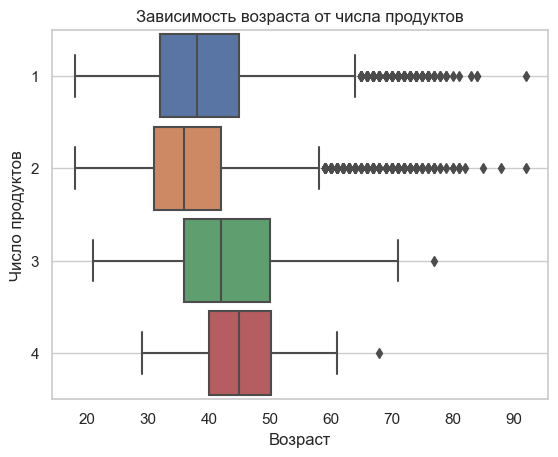

In [12]:
boxplot = sns.boxplot(
    data=churn_data,
    y='NumOfProducts',
    x='Age',
    orient='h',
    width=0.9,
)
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Число продуктов');
boxplot.set_title('Зависимость возраста от числа продуктов')
boxplot.grid()

Для клиентов с более чем 1м купленным продуктом можно сказать что гипотеза оправдалась.
3 и 4 продукта купили более старшие люди, которые попали в "опасную" зону по возрасту.
Я бы в первую очередь обратил все-таки на возрастную категорию 40-50 и постарался понять причины их ухода. И пока на этом этапе не считал бы, что дополнительные купленные 3ий и 4ый продукт мотивируют клиента уйти.

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

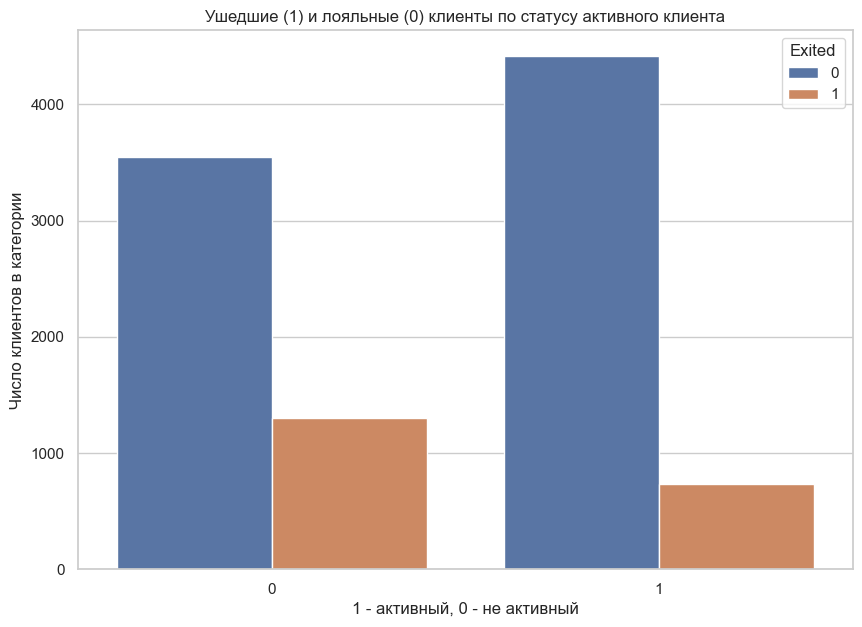

In [13]:
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='Num',
    hue='Exited',
    estimator=sum
)
barplot.set_title('Ушедшие (1) и лояльные (0) клиенты по статусу активного клиента');
barplot.set_xlabel('1 - активный, 0 - не активный');
barplot.set_ylabel('Число клиентов в категории');

А вот тут результат ожидаемый. Клиенты со статусом активного клиента банка уходят реже.
Первая идея: стараться мотивировать клиентов становится активными. Мне не очень понятно, как этот статус получают и какие действия банка на это влияют.
Вторая идея: появилась гипотеза, что люди более старшего возраста являются клиентами не имеющими активного статуса. Проверим это построим снова коробчатые диараммы возраста по ативности:

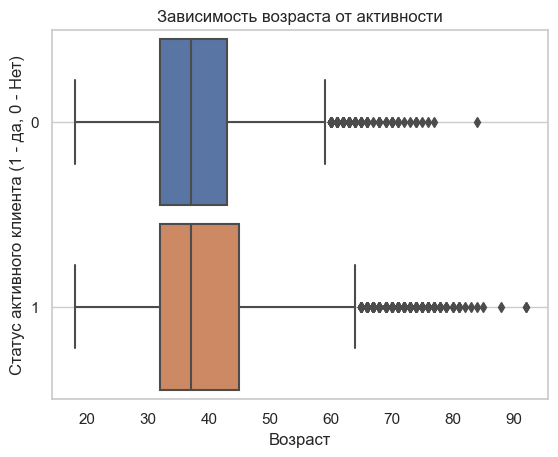

In [14]:
boxplot = sns.boxplot(
    data=churn_data,
    y='IsActiveMember',
    x='Age',
    orient='h',
    width=0.9,
)
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Статус активного клиента (1 - да, 0 - Нет)');
boxplot.set_title('Зависимость возраста от активности')
boxplot.grid()

Я бы сказал, что вторая идея не подтвердилась. Медианы идеально совпадают в обеих группах. И группы по возрасту схожи.
Проверим тогда третью идею. Возможно есть смысл продавать более активно второй продукт неактивным клиентам, тем кто приобрел только один.
Построим диаграмму которая покажет не являются ли неактивные клиенты в основнои теми, кто купил только один продукт.  

1    2563
2    2446
3     113
4      29
Name: NumOfProducts, dtype: int64

Text(0.5, 1.0, 'Процент активных клиентов по числу купленных продуктов')

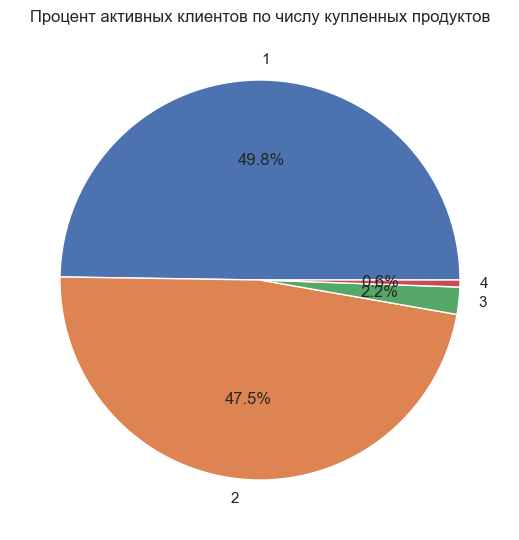

In [15]:
churn_data_ex = churn_data[churn_data['IsActiveMember'] == 1]['NumOfProducts'].value_counts() # считаем число
display(churn_data_ex)
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_data_ex, #значения
    autopct='%.1f%%', #формат выведения процента
    labels = churn_data_ex.index
#    explode=[0.1,0.05,0,0,0,0,0,0,0,0] #это отступы кусочков
    );
axes.set_title('Процент активных клиентов по числу купленных продуктов', fontsize=12)

1    2521
2    2144
3     153
4      31
Name: NumOfProducts, dtype: int64

Text(0.5, 1.0, 'Процент неактивных клиентов по числу купленных продуктов')

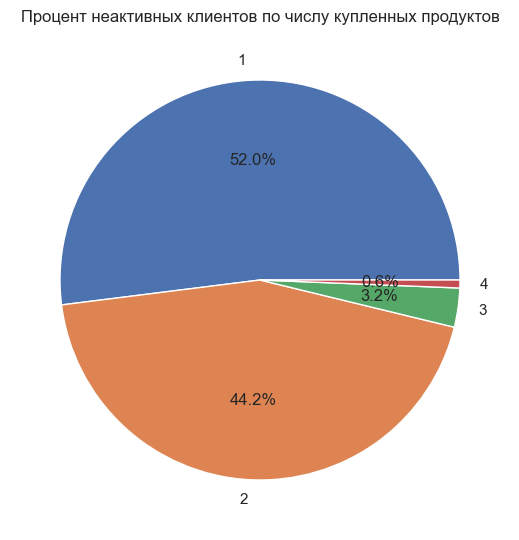

In [16]:
churn_data_ex = churn_data[churn_data['IsActiveMember'] == 0]['NumOfProducts'].value_counts() # считаем число
display(churn_data_ex)
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_data_ex, #значения
    autopct='%.1f%%', #формат выведения процента
    labels = churn_data_ex.index
#    explode=[0.1,0.05,0,0,0,0,0,0,0,0] #это отступы кусочков
    );
axes.set_title('Процент неактивных клиентов по числу купленных продуктов', fontsize=12)

Если честно, идея 3 тоже особо не подтвердилась. Смысл допродажи второго продукта конечно есть всегда, но какой-то сильной зависимости, я не увидел.
Поэтому остается работать над активностью клиентов.

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [17]:
choropleth_data = churn_data.groupby('Geography', as_index=False).sum()
choropleth_data['ExitPercent'] = choropleth_data['Exited']/choropleth_data['Num']
display(choropleth_data)
#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="ExitPercent", #от чего зависит цвет
#    animation_frame="date", #анимационный бегунок
    range_color=[0, 0.5], #диапазон цвета
    title='Процент ухода клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

,Geography,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Num,ExitPercent
0,France,25196496,78672919670,3257437,193098,25093,3.113325e+08,7676,3543,2591,5.008945e+08,810,5014,0.161548
1,Germany,12545700,39367604133,1634497,99787,12570,3.004029e+08,3813,1791,1248,2.536936e+08,814,2509,0.324432
2,Spain,12262804,38868881891,1613354,96333,12465,1.531236e+08,3813,1721,1312,2.463143e+08,413,2477,0.166734


Гипотеза состоит в том, что средний возраст немцев как повыше, чем во Испании и Франции и попадает на наш "плохой" интервал по возрасту ухода.
Проверим в вики. По данным, которые я нашел гипотеза не подтвердилась. Да в Германии средний возраст око 45 лет как раз. А во Франции меньше. Но в Испании примерно как в Германии, а не как во Франции.
Посмотрим на средний возраст клиентов по странам:

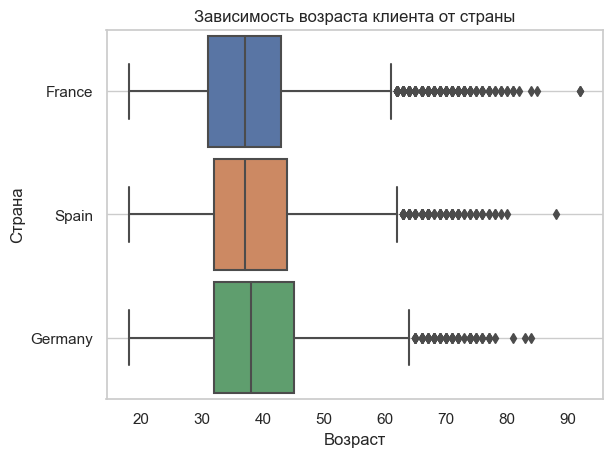

In [18]:
boxplot = sns.boxplot(
    data=churn_data,
    y='Geography',
    x='Age',
    orient='h',
    width=0.9,
)
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Страна');
boxplot.set_title('Зависимость возраста клиента от страны')
boxplot.grid()

Ну да, конечно медианный возраст клиента в Германии повыше и рспределение пошире к более старшим, но мне не вериться, что это дает разницу в доле в два раза.
Не считаю, что гипотеза верна. Надо смотреть на другие параметры. Самое логичное объяснение, что в Германии, например, есть более сильные конкуренты на нашего клиента.

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


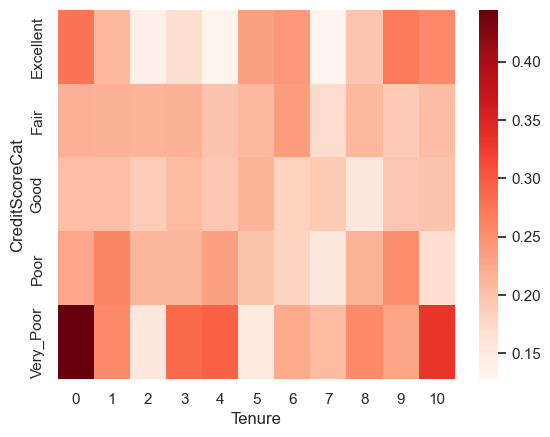

In [19]:
from turtle import title


def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
)


display(pivot)
heatmap = sns.heatmap(
    data=pivot,
    cmap='Reds'
    )


Итак, посмотрим в каких категориях наибольший отток клиентов.

Очень бедные новые клиенты у нас не задерживаются в 44% случаях. (Клиенты с наихудшим кредитным рейтингом)

На втором месте в 1/3 случаев у нас не задерживаются клиенты с наихудшим рейтингом, которые с нами уже 10 лет. Это кстати как раз может иметь корреляцию с возрастом.

И в целом клиенты с худшей кредитной историей - самая яркая на карте группа в среднем.

И также рассмотрим категории с потерей клиентов более 25% не из категории худшей кредитной истории:
1. Новые клиенты с лучшей кредитной историей. Здесь есть смысл поработать - такие клиенты могуь быть интересны.
2. 9-10 летние клиенты с лучшей крединой историей. Тут я предполагаю зависимость от возраста.
3. Клиенты с плохой кредитной историей с 2х и 9ти лет с нашим банков. Если честно, я не думаю, что стоит акцент делать на данные группы. Мне кажется тут те же зависимости: возраст с одной стороны, и плозая кредитная история с другой. Надо принимать решение по этим параметрам.

Когда мы изучаем потери бизнеса, имеют смысл и абсолютные значения потерь. Поэтому изучим аналогичную тепловую карту, но уже по абсолютному числу ушедших клиентов, чтобы проверить целесообразность акцента на выделенные выше категории:



Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,11,20,14,17,12,21,21,12,20,26,13
Fair,20,47,49,50,43,48,52,45,51,42,23
Good,32,79,74,76,72,83,64,71,55,73,36
Poor,24,69,54,52,59,47,43,36,53,58,20
Very_Poor,8,17,10,18,17,10,16,13,18,14,9


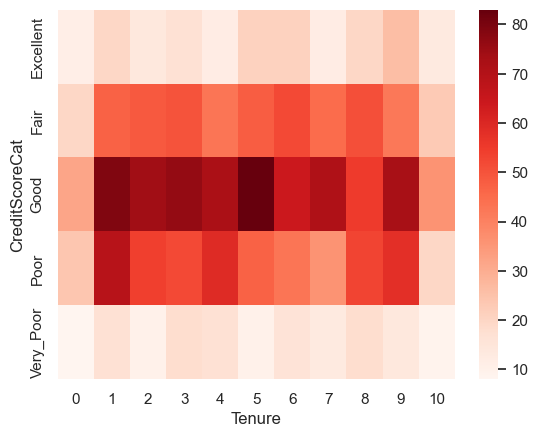

In [20]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='sum'
)


display(pivot)
heatmap = sns.heatmap(
    data=pivot,
    cmap='Reds'
    )

И вот тут я бы сказал, что вероятно потери в категории плохой кредитной истории не столь значимы, не смотря на высокую долю. Абсолтное число клиентов мы теряем на нашей, казалось бы, самой сильной группе клиентов - средняя кредная история во всех возрастах клиентов. Я понимаю, что это потому что таких клиентов таких просто больше. Но результаты действий по удержанию таких и сведению доле ухода таких клиентов к достижимым показателям ухода 14%-15%, например, принесут бизнесу больше пользы.